[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fernigithub/series_temporales_101/blob/main/Series_temporales.ipynb)

## Date and time series functionality

They either represent points in time or periods of time. They contain attributes and methods to access and manipulate time dimension of data. 

Any column can have date-time information, but it is important to have it as the index as an index as timestamp/period makes the entire dataframe a time-series.

### Basic building block: pd.Timestamp

## Funcionalidad de series de tiempo y fechas

Representan puntos en el tiempo o períodos de tiempo. Contienen atributos y métodos para acceder y manipular la dimensión temporal de los datos.

Cualquier columna puede tener información de fecha y hora, pero es importante tenerla como índice, ya que como índice de timestamp/período convierte todo el dataframe en una serie temporal.

### Bloque básico de construcción: pd.Timestamp


In [1]:
import pandas as pd
from datetime import datetime #to create dates manually

In [2]:
time_stamp=pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') ==time_stamp #this confirms if it understand dates as timestamp or not

True

In [3]:
time_stamp #to check the type

#time is automatically set to midnight

Timestamp('2017-01-01 00:00:00')

In [4]:
time_stamp.year

2017

### More building blocks: pd.Period and freq

Period object has freq attribute to store frequency information which can be set to monthly or daily.

You can convert period object to timestamp and vice versa

Frequency infor enables basic date arithmetic

### Más bloques de construcción: pd.Period y freq

El objeto Period tiene un atributo freq para almacenar información de frecuencia que puede configurarse como mensual o diario.

Puedes convertir un objeto Period a timestamp y viceversa.

La información de frecuencia permite la aritmética básica de fechas.


In [5]:
period=pd.Period("2017-01")
period

Period('2017-01', 'M')

In [6]:
period.asfreq("D")

Period('2017-01-31', 'D')

In [7]:
period.to_timestamp().to_period("M")

Period('2017-01', 'M')

In [8]:
period+2

Period('2017-03', 'M')

### Sequences of dates and times

You can create a time series by specifying date range, start, end, periods and frequency

### Secuencias de fechas y horas

Puedes crear una serie temporal especificando el rango de fechas, inicio, fin, períodos y frecuencia.

In [9]:
index=pd.date_range(start="2017-1-1", periods=12, freq="M")

In [10]:
index #datetime64 is the datatype and ns is nanoseconds

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [11]:
index[0] #the first element is a timestamp

Timestamp('2017-01-31 00:00:00', freq='M')

In [12]:
index.to_period() #this creates an index with timestamps

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

In [13]:
pd.DataFrame ({'data':index}).info() #we made a time series with dates as index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [14]:
import numpy as np
data=np.random.random(size=(12,2))
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


## Indexing and resampling time series

Basic time series transformations include:

<li> Parsing string dates and convert to datetime64 </li>
<li> Selecting and slicing for specific subperiods </li>
<li> Setting and changing DateTimeIndex frequency {Upsampling and Downsampling } </li>


Indexación y remuestreo de series temporales

## Las transformaciones básicas de series temporales incluyen:

	•	Parsear fechas en cadena y convertirlas a datetime64.
	•	Seleccionar y segmentar períodos específicos.
	•	Establecer y cambiar la frecuencia de DateTimeIndex {Upsampling y Downsampling}.


In [15]:
import pandas as pd
google=pd.read_csv("/Users/srtpan/Downloads/GOOG.csv")

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


## Converting string dates to datetime 64

Two methods:

pd.to_datetime()
    <li> Parse date string </li>
    <li> Convert to datetime64 </li>

## Convertir fechas en cadena a datetime64

Dos métodos:

	•	pd.to_datetime()
	•	Parsear cadena de fecha.
	•	Convertir a datetime64.

In [17]:
google.Date=pd.to_datetime(google.Date)

In [18]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [19]:
google.set_index("Date", inplace=True)
google.info()

# The resulting DateTimeIndex lets you treat the entire DataFrame as time series data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


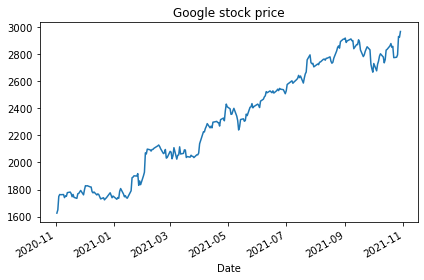

In [20]:
import matplotlib.pyplot as plt
google.Close.plot(title="Google stock price")
plt.tight_layout()
plt.show()

## Partial string indexing

<li> Selecting/indexing using strings that parse to dates </li>

## Indexación parcial de cadenas

	•	Seleccionar/indexar usando cadenas que se convierten a fechas.


In [21]:
google.loc["2021"].info() #this is the new way instead of df["2020"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2021-01-04 to 2021-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       209 non-null    float64
 1   High       209 non-null    float64
 2   Low        209 non-null    float64
 3   Close      209 non-null    float64
 4   Adj Close  209 non-null    float64
 5   Volume     209 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.4 KB


In [22]:
google["2020-10":"2021-3"].info() #date range will be inclusive of the end date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2020-11-02 to 2021-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       103 non-null    float64
 1   High       103 non-null    float64
 2   Low        103 non-null    float64
 3   Close      103 non-null    float64
 4   Adj Close  103 non-null    float64
 5   Volume     103 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.6 KB


In [23]:
google.loc["2021-09-10","Close"]

2838.419922

## Set frequency using .asfreq()

Convert DateTimeIndex to calendar day frequency

## Establecer frecuencia usando .asfreq()

Convertir DateTimeIndex a frecuencia de día calendario.

In [24]:
google_upsampled=google.asfreq("D")

In [25]:
google_upsampled.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400.0
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700.0
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900.0
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800.0
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900.0
2020-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-08,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-09,1790.900024,1818.060059,1760.020020,1763.000000,1763.000000,2268300.0
2020-11-10,1731.089966,1763.000000,1717.300049,1740.390015,1740.390015,2636100.0


Above, you can see that the missing dates from the stock reports have been filled with NaN values.

Month to day -> Upsampling (increasing frequency)
Day to Month -> Downsampling (decreasing frequency)

We can also change the frequency to Business days


Arriba, puedes ver que las fechas faltantes de los informes de acciones se han llenado con valores NaN.

Mes a día -> Upsampling (aumentar la frecuencia)
Día a mes -> Downsampling (disminuir la frecuencia)

También podemos cambiar la frecuencia a días hábiles.

In [26]:
google_businessdays=google.asfreq("B")
google_businessdays.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400.0
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700.0
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900.0
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800.0
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900.0


## Basic time series calculations

Typical time series manipulations include:

<li> Shift or lag values back or forward in time </li>
<li> Get the difference in value for a given time period </li>
<li> Compute the percent change over any number of periods </li>

pandas built-in methods rely on pd.DateTimeIndex


## Cálculos básicos de series temporales

Las manipulaciones típicas de series temporales incluyen:

	•	Desplazar o retrasar valores en el tiempo.
	•	Obtener la diferencia en valor para un período de tiempo dado.
	•	Calcular el cambio porcentual sobre cualquier número de períodos.

Los métodos integrados de pandas dependen de pd.DateTimeIndex.

In [27]:
google=pd.read_csv("/Users/srtpan/Downloads/GOOG.csv", parse_dates=["Date"], index_col="Date")
#this is another method to make a dataframe for google stocks as you are parsing date column as time series
#and now you will not need to convert to datetime object

In [28]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [29]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900


Here, you can see that the time series is properly formatted with date as the index
of the dataframe. It helps us omit the conversion to datetime object and then setting the index to date column.

### .shift(): Moving data between past and future

.shift():

<li> defaults to periods=1 </li>
<li> 1 period into future </li>

In [30]:
google["shifted"]=google.Close.shift(periods=1)
google.head()

,Open,High,Low,Close,Adj Close,Volume,shifted
Date,,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400,NaN
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700,1626.030029
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900,1650.209961
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800,1749.130005
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900,1763.369995


In [31]:
google["lagged"]=google.Close.shift(periods=-1) #negative period number
google.tail(5)

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged
Date,,,,,,,,
2021-10-25,2776.209961,2784.115967,2734.969971,2775.459961,2775.459961,1054100,2772.500000,2793.439941
2021-10-26,2812.120117,2816.790039,2780.110107,2793.439941,2793.439941,1412900,2775.459961,2928.550049
2021-10-27,2798.050049,2982.360107,2798.050049,2928.550049,2928.550049,2592500,2793.439941,2922.580078
2021-10-28,2945.979980,2948.489990,2895.270020,2922.580078,2922.580078,1620900,2928.550049,2965.409912
2021-10-29,2910.399902,2972.260010,2903.330078,2965.409912,2965.409912,1447300,2922.580078,NaN


In case of shift, the values move one place into the future and in case of lag, the values move one place into the past. 

shifting data is helpful to compare data at different points in time. 

### Calculate one-period percent change 

xt/xt-1

We will use the method div which not only allows to find the fraction for a particular value in the dataframe, but also across different columns in time series.

In [32]:
google["change"]=google.Close.div(google.shifted)

In [33]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged,change
Date,,,,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400,NaN,1650.209961,NaN
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700,1626.030029,1749.130005,1.014871
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900,1650.209961,1763.369995,1.059944
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800,1749.130005,1761.750000,1.008141
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900,1763.369995,1763.000000,0.999081


## .diff(): built-in time-series change 

Difference in value for two adjacent periods 

xt-x(t-1)

In [34]:
google["diff"]=google.Close.diff()

In [35]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged,change,diff
Date,,,,,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400,NaN,1650.209961,NaN,NaN
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700,1626.030029,1749.130005,1.014871,24.179932
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900,1650.209961,1763.369995,1.059944,98.920044
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800,1749.130005,1761.750000,1.008141,14.239990
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900,1763.369995,1763.000000,0.999081,-1.619995


## .pct_change(): built-in time-series % change

Since calculating period and percentage change is pretty common, pandas has a built-in method .pct_change() to calculate percent change for two adjacent periods.

xt/x(t-1)

In [36]:
google["pct_change"]=google.Close.pct_change().mul(100)
google.head()

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400,NaN,1650.209961,NaN,NaN,NaN
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700,1626.030029,1749.130005,1.014871,24.179932,1.487053
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900,1650.209961,1763.369995,1.059944,98.920044,5.994391
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800,1749.130005,1761.750000,1.008141,14.239990,0.814118
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900,1763.369995,1763.000000,0.999081,-1.619995,-0.091869


## Comparing time series growth rates

This will help us to compare different growth rates in a time-series

Stock prices series are hard to compare because they start at different levels. An easier method is to normalize price series to start at 100 so that they start at same value. 

we do this by dividing all prices by the first element in the series and then multiply by 100. This will give same starting point to the time-series. All prices will become relative to the starting point. They will reflect difference to starting point in percentage points. 

In [37]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,,
2020-11-02,1628.160034,1660.770020,1616.030029,1626.030029,1626.030029,2535400,NaN,1650.209961,NaN,NaN,NaN
2020-11-03,1631.780029,1661.699951,1616.619995,1650.209961,1650.209961,1661700,1626.030029,1749.130005,1.014871,24.179932,1.487053
2020-11-04,1710.280029,1771.364990,1706.030029,1749.130005,1749.130005,3570900,1650.209961,1763.369995,1.059944,98.920044,5.994391
2020-11-05,1781.000000,1793.640015,1750.510010,1763.369995,1763.369995,2065800,1749.130005,1761.750000,1.008141,14.239990,0.814118
2020-11-06,1753.949951,1772.430054,1740.349976,1761.750000,1761.750000,1660900,1763.369995,1763.000000,0.999081,-1.619995,-0.091869


In [38]:
first_price=google.Close.iloc[0]
first_price

1626.030029

<AxesSubplot:title={'center':'Google normalized Series'}, xlabel='Date'>

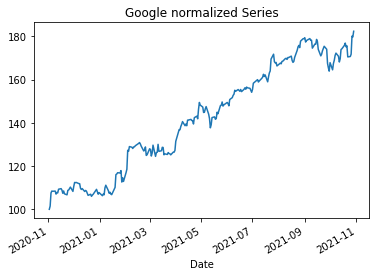

In [39]:
normalized=google.Close.div(first_price).mul(100)
normalized.plot(title="Google normalized Series")

## Changing the time series frequency: resampling

You might sometimes need to convert two time series to same frequency to be able to analyze them together.

In the pervious sections, we have seen how we can use DateTimeIndex to set and change frequency using .asfreq()

However, frequency conversion affects the data.

<li> When we upsample the data, we have new rows containung the missing dates and we need to fill or interpolate missing data </li>

<li> On the other hand, if we downsample the data, we are supposed to aggregate existing data </li>

#### Let's start working with quarterly data

In [40]:
dates=pd.date_range(start="2016", periods=4, freq="Q")
data=range(1,5)
quarterly=range(1,5)
quarterly=pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [41]:
#upsampling from quarterly to monthly data 

monthly=quarterly.asfreq("M")
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

You can notice here that pandas has added months in between the quarters to account for the upsampling.

We will see different methods that pandas offers to fill the missing values

We will create a DataFrame that contains all alternatives to the baseline, our first column. 

In [42]:
monthly=monthly.to_frame("baseline")

In [43]:
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


## Upsampling: fill methods
<br>
<li> Forward fill </li>
<li> Backward fill </li> 
<li> Filling with a value </li>

In [44]:
monthly['ffill']=quarterly.asfreq("M",method="ffill")
monthly["bfill"]=quarterly.asfreq("M",method="bfill")
monthly['value']=quarterly.asfreq("M",fill_value=0)

In [45]:
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


## Add missing months: .reindex()

In [46]:
dates=pd.date_range(start="2016", periods=12, freq="M")
dates

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

.reindex():
    
<li> conform DataFrame to new index </li>
<li> sane filling logic as .asfreq() </li>

In [47]:
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

## Upsampling and interpolation with .resample()

.resample() is similar to .groupby()

<li> Groups data within resampling period and applies one or several methods to each group </li>
<li> New date determined by offset- start, end, etc </li>
<li> Upsampling: fill from existing or interpolate values </li>

In [73]:
unrate=pd.read_csv("/Users/srtpan/Downloads/unrate.csv", parse_dates=["Date"], index_col="Date")
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2005-01-01 to 2021-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rate    201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [74]:
unrate.head() 

,Rate
Date,
2005-01-01,5.3
2005-02-01,5.4
2005-03-01,5.2
2005-04-01,5.2
2005-05-01,5.1


## Resampling period and frequency offests
<br>

<li> Resample creates new date for frequency offset </li>
<li> Several alternatives to calendar month end </li>

<ul> Calendar month end: "M" </ul>
<ul> Calendar Month Start: "MS" </ul>
<ul> Business Month End: "BM" </ul>
<ul> (Business Month Start: "BMS" </ul>

In [81]:
unrate.asfreq("D")

,Rate
Date,
2005-01-01,5.3
2005-01-02,NaN
2005-01-03,NaN
2005-01-04,NaN
2005-01-05,NaN
...,...
2021-08-28,NaN
2021-08-29,NaN
2021-08-30,NaN


In [82]:
unrate.asfreq("MS").equals(unrate.resample("MS").asfreq())

True

We can set the data to Month end and then use forward fill to fill the data and resample accordingly. 

In [83]:
unrate_ffill=unrate.resample("D").ffill().add_suffix("_ffill")

In [84]:
unrate_ffill

,Rate_ffill
Date,
2005-01-01,5.3
2005-01-02,5.3
2005-01-03,5.3
2005-01-04,5.3
2005-01-05,5.3
...,...
2021-08-28,5.2
2021-08-29,5.2
2021-08-30,5.2


## Downsampling and aggregation
<br>

Sometimes we might require to downsample our data; from hour to day and day to month. 

In this case, we need to think how to represent the existing values at the new date; mean, median or anything else?

Going back to the Google data, the frequency is set as "Daily". We will try to create monthly data by resampling the daily data

In [86]:
google.resample("M").mean().head() #this assigns monthly average to end of calendar month
#we can do something similar for median values

,Open,High,Low,Close,Adj Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,,
2020-11-30,1745.357190,1767.586499,1731.672998,1748.348499,1748.348499,1.751770e+06,1747.696315,1756.951996,1.004335,7.089998,0.433515
2020-12-31,1771.721153,1788.331005,1755.449674,1772.278182,1772.278182,1.430268e+06,1772.680908,1769.102728,0.999824,-0.402727,-0.017590
2021-01-31,1802.270000,1830.654997,1782.300801,1808.383693,1808.383693,1.741195e+06,1803.970009,1817.494744,1.002684,4.413683,0.268396
2021-02-28,2060.119462,2090.174426,2042.307373,2068.356824,2068.356824,1.548895e+06,2057.771561,2077.838931,1.005698,10.585263,0.569795
2021-03-31,2061.127834,2084.976849,2038.413702,2059.844785,2059.844785,1.512791e+06,2058.463485,2062.290002,1.000812,1.381300,0.081222


In [88]:
google.resample("M").agg(['mean','std']).head()

Open                    High                     Low  \
                   mean        std         mean        std         mean   
Date                                                                      
2020-11-30  1745.357190  44.273822  1767.586499  39.431870  1731.672998   
2020-12-31  1771.721153  32.456201  1788.331005  35.161001  1755.449674   
2021-01-31  1802.270000  69.906849  1830.654997  70.145961  1782.300801   
2021-02-28  2060.119462  66.381665  2090.174426  57.331024  2042.307373   
2021-03-31  2061.127834  18.650866  2084.976849  23.875169  2038.413702   

                             Close               Adj Close             ...  \
                  std         mean        std         mean        std  ...   
Date                                                                   ...   
2020-11-30  43.064247  1748.348499  40.568290  1748.348499  40.568290  ...   
2020-12-31  33.683957  1772.278182  34.406810  1772.278182  34.406810  ...   
2021-01-31  65.704537  1808.383693  67.250379  1808.383693  67.250379  ...   
2021-02-28  65.136723  2068.356824  60.215095  2068.356824  60.215095  ...   
2021-03-31  19.192515  2059.844785  24.549901  2059.844785  24.549901  ...   

                shifted                  lagged               change  \
                   mean        std         mean        std      mean   
Date                                                                   
2020-11-30  1747.696315  41.572097  1756.951996  30.177488  1.004335   
2020-12-31  1772.680908  34.207961  1769.102728  35.126412  0.999824   
2021-01-31  1803.970009  68.101726  1817.494744  67.515243  1.002684   
2021-02-28  2057.771561  80.365509  2077.838931  44.621159  1.005698   
2021-03-31  2058.463485  24.924055  2062.290002  29.171647  1.000812   

                           diff            pct_change            
                 std       mean        std       mean       std  
Date                                                             
2020-11-30  0.017215   7.089998  29.090893   0.433515  1.721479  
2020-12-31  0.010593  -0.402727  18.749279  -0.017590  1.059280  
2021-01-31  0.021607   4.413683  39.243680   0.268396  2.160702  
2021-02-28  0.021409  10.585263  41.911053   0.569795  2.140943  
2021-03-31  0.017004   1.381300  35.320165   0.081222  1.700355  

[5 rows x 22 columns]

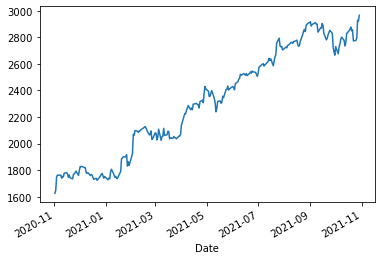

In [91]:
ax=google["Close"].plot()
monthly=google.resample("M").mean()


## Rolling window functions

Window function in Python is quite useful as it helps to identify sub periods of our time series and helps us to create time series from the main time series. 

It helps us to calculate metrics for sub periods inside the window. It also allows us to create a new time series containing data points that represent a summary of several data points of the original time series. 

Two main types of windows:

<li> Rolling: same size, sliding </li>
<li> Expanding: contain all prior values </li>

## Calculating a rolling average

Let's go back to the Google data

In [93]:
data=pd.read_csv("/Users/srtpan/Downloads/GOOG.csv", parse_dates=["Date"], index_col="Date")

In [94]:
data.rolling(window=30).mean()

#window=30
#min_periods: choose value<30 to get results for first days

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-25,2797.826937,2818.700627,2770.468970,2795.270345,2795.270345,1.174937e+06
2021-10-26,2795.456942,2816.108626,2767.868970,2792.781006,2792.781006,1.190507e+06
2021-10-27,2792.885946,2818.466300,2766.299967,2793.595337,2793.595337,1.242510e+06


<AxesSubplot:xlabel='Date'>

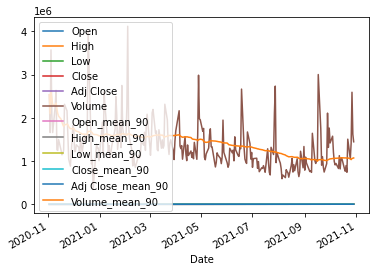

In [95]:
r90=data.rolling(window="90D").mean()
google.join(r90.add_suffix("_mean_90")).plot() 

You can observe the plot containing 90 days data  is much smoother because every data point is average of previous 90 days.

Also, you can see when short term trends deviate from longer term trends. For instance, we can point out when the 90 day avergae dips below the 360 days average.

## Multiple rolling metrics

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

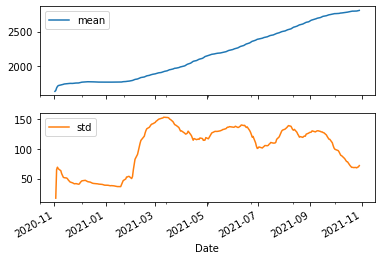

In [97]:
r=data.Close.rolling("90D").agg(["mean","std"])
r.plot(subplots=True)

<AxesSubplot:xlabel='Date'>

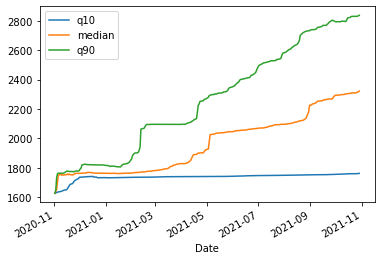

In [98]:
rolling=data.Close.rolling("360D")
q10=rolling.quantile(0.1).to_frame("q10")
median=rolling.median().to_frame("median")
q90=rolling.quantile(0.9).to_frame("q90")
pd.concat([q10,median,q90],axis=1).plot()

## Expanding window functions with pandas

Next step after reading rolling windows is to read about expanding windows.

They are useful in calculating metrics for periods up to current data. The new time series reflects all historical values upto that point. They are useful to calculate running rate of return, running min/max

Two ways to do it:

<li> .expanding() just like .rolling () </li>
<li> methods like .cumsum(), .max(), etc </li>

In [99]:
df=pd.DataFrame ({"data":range(5)})
df["expanding sum"]=df.data.expanding().sum() #method 1
df["cumulative sum"]=df.data.cumsum() #method 2
df

,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [105]:
data=pd.read_csv("/Users/srtpan/Downloads/S&P.csv", parse_dates=["Date"], index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-01 to 2020-11-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


### How to calculate a running return?


Single period return rt: current price over last price minus 1:
    
    rt=(Pt/Pt-1)-1
    
Multi-period return is the product of (1+rt) for all periods minus 1:

RT=(1+r1)(1+r2)....(1+rT)-1

Methods in pandas for the same:

<li> For the period return: .pct_change() </li>
<li> For basic math: .add(), .sub(), .mul(), .div() </li>
<li> For cumulative product .cumprod() </li>


<AxesSubplot:xlabel='Date'>

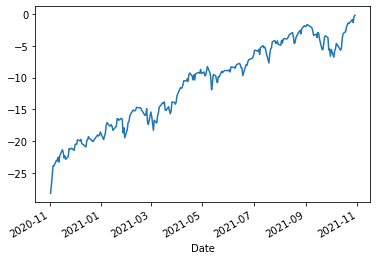

In [107]:
pr=data.Close.pct_change()
pr_plus_one=pr.add(1)
cumulative_return =pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

<AxesSubplot:xlabel='Date'>

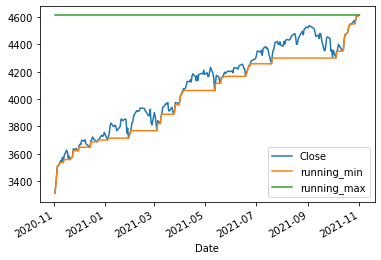

In [108]:
data["running_min"]=data.Close.expanding().min()
data["running_max"]=data.Close.expanding().max()
data.plot()

## Relationship between time series: correlation

So far, we have focussed on individual time series, now we will start focussing on relationships between time series. 

Correlation is basically a measure of linear relationships. It is really important for prediction and risk management. 

Pandas and seaborn have tools to compute and visualize. 

Correlation coefficient measure how similar is the pairwise movement of two variables around their averages.The pairwise co-movement is called covariance.
The correlation coefficient divides this measure by the product of standard deviations for each variable. It varies between -1 and +1. The more is the value closer to +1 or -1, the closer it resembles to a straight line. 

A positive sign means that when one entity is above mean then the other is likely to be above its mean. However, there are numerous types of non-linear relationsips that the correlation coefficient does not capture. 

In [118]:
data=pd.read_csv("/Users/srtpan/Downloads/Indices.csv", parse_dates=["Date"], index_col="Date")
data.head()

,Dow Jones,S&P
Date,,
2021-01-11,31008.69,4613.67
2021-01-08,31097.97,4605.38
2021-01-07,31041.13,4596.42
2021-01-06,30829.40,4551.68
2021-01-05,30391.60,4574.79


In [119]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-01-11 to 2020-01-14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dow Jones  252 non-null    float64
 1   S&P        252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


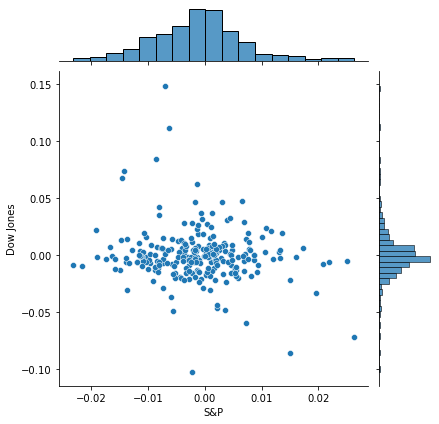

In [122]:
daily_returns=data.pct_change()
sns.jointplot(x="S&P", y="Dow Jones", data=daily_returns) #Jointplot helps to show the distribution of two variables together in one plot

We can notice from the graph that correlation is quite weak and the data is really quite scattered.

let's find the correlation numerically

In [124]:
correlations=daily_returns.corr()
correlations

,Dow Jones,S&P
Dow Jones,1.000000,-0.150954
S&P,-0.150954,1.000000


The numerical value confirms what we saw visually. Both the indices have a very weak correlation with a negative sign. 

<AxesSubplot:>

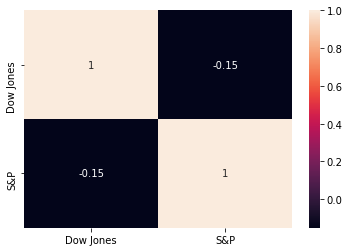

In [125]:
sns.heatmap(correlations, annot=True)